### load libraries

In [1]:
library(tidyverse)
library(cluster)
library(factoextra)
library(gridExtra)
library(lsa)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: SnowballC



### load data

In [2]:
df <- read.csv('clust_data_sample.csv', header=TRUE)
df_data <- df[2:7]
rownames(df_data) <- paste(df$labels, 1:dim(df)[1], sep="_")
head(df_data)

,trackAcoustic,trackInstrum,trackLoud,trackTempo,trackVal,trackDanceable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alt_hip hop_1,-0.5510692,-0.5006835,0.7207687,-0.9738717,0.37156619,1.3228885
rock_alt_pop_metal_neo mellow_grunge_2,-0.6551473,-0.5006835,0.6744166,0.9648682,-0.70508916,-0.7228409
rock_pop_rumba_flamenco_3,0.6069687,-0.5006835,0.6517285,-0.4554649,1.50006051,1.5830391
rock_country_4,-0.4507082,-0.5006835,0.2194344,0.3671425,0.01666869,-0.2616649
alt_pop_dance_electro_5,-0.2547169,-0.5006835,1.1167130,-0.4911080,-0.07504640,0.8498875
rock_pop_punk_neo mellow_6,-0.7585496,-0.5006835,0.4499750,-0.7691240,0.18813602,0.9799627


we have too much data for R memory. Randomly sample a subset of 200 points:

In [3]:
set.seed(42)
df_data_samp = df_data[sample(nrow(df_data), 200), ]
df_data_samp

,trackAcoustic,trackInstrum,trackLoud,trackTempo,trackVal,trackDanceable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
jazz_electro_61413,-0.7673354,0.68387544,0.31213853,1.334930259,0.44733083,0.09899835
jazz_downtempo_electro_tronica_54425,0.4886981,0.52170368,-1.23260546,-0.282987209,0.44334322,0.77893732
alt_dance_rave_downtempo_electro_tronica_99556,-0.7551704,1.38191913,0.27944812,0.339949441,1.34055601,0.59564942
house_electro_74362,-0.7975789,0.95533687,-0.27043390,0.107139300,0.04059436,0.59564942
rock_pop_indie_46208,-0.7913274,0.37715928,0.12502251,0.413043828,1.22890287,0.58973691
rumba_flamenco_178200,-0.3358168,2.88377069,0.05890981,-0.207180471,1.67152785,0.91492511
jazz_147812,1.7558828,2.37962803,-0.47340721,-1.549898617,-1.18759027,-1.33774225
rock_alt_pop_metal_funk_grunge_61605,-0.8115179,0.65214618,0.56829475,0.287162915,0.64272384,0.02213568
rock_indie_psych_73236,-0.3594709,0.88835288,0.35141582,-1.082331005,1.03350986,0.18768604


### Elbow method:

First let's use the elbow method to start getting a sense for how many clusters our data might have.

In [9]:
png("FIGURES/elbow1.png", width=4, height=4, units="in", res=300)
fviz_nbclust(df_data_samp, kmeans, method="wss") + geom_vline(xintercept=3, linetype=2)
dev.off()

png 
  2

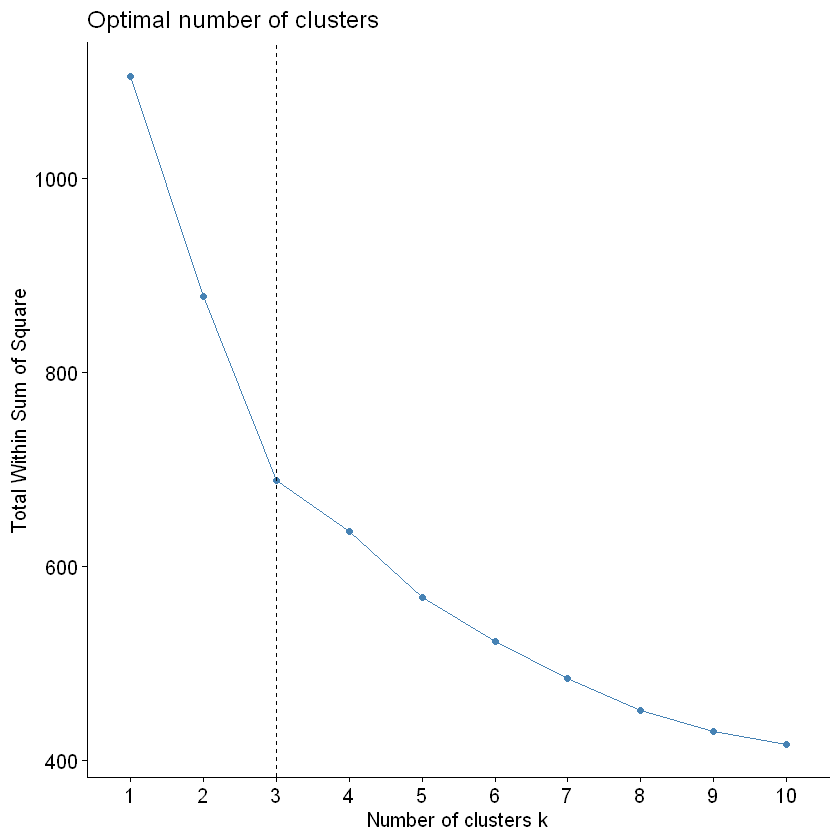

In [10]:
fviz_nbclust(df_data_samp, kmeans, method="wss") + geom_vline(xintercept=3, linetype=2)

Hard to tell definitively with visual inspection, looks like maybe 3 clusters? Maybe 4?

### Silhouette method:

Next let's use the silhouette method to determine the optimal number of clusters

In [11]:
png("FIGURES/silhouette.png", width=4, height=4, units="in", res=300)
fviz_nbclust(df_data_samp, kmeans, method="silhouette")
dev.off()

png 
  2

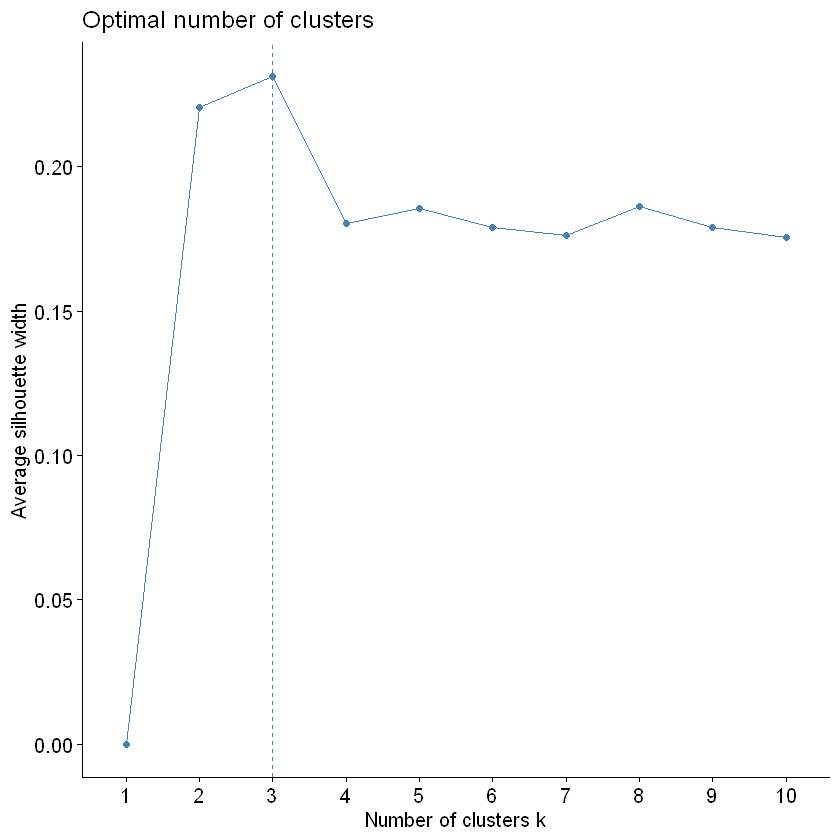

In [12]:
fviz_nbclust(df_data_samp, kmeans, method="silhouette")

Silhouette seems to support 3 clusters...

### Gap statistic method:

Try this too

In [13]:
gap_stat <- clusGap(df_data_samp, FUN=kmeans, nstart=25,
                   K.max=10, B=50)

png("FIGURES/gapstat.png", width=4, height=4, units="in", res=300)
fviz_gap_stat(gap_stat)
dev.off()

png 
  2

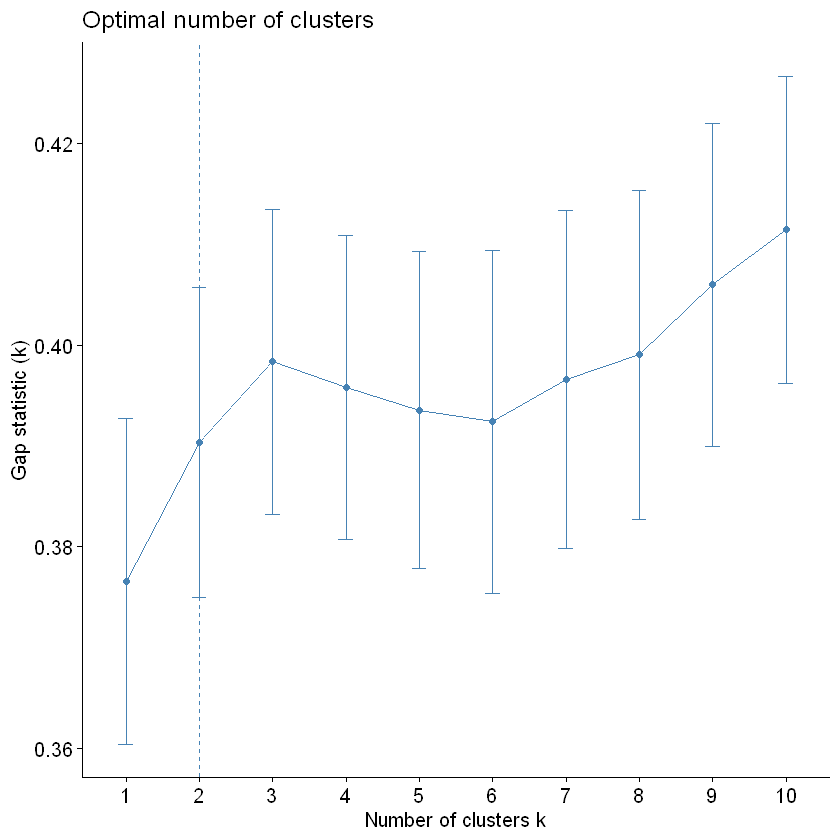

In [15]:
fviz_gap_stat(gap_stat)

Interestingly Gap selected 2 although the first local max seems to be 3?

### Kmeans with several k values:

In [16]:
k2 <- kmeans(df_data_samp, centers=2, nstart=25)
k3 <- kmeans(df_data_samp, centers=3, nstart=25)
k4 <- kmeans(df_data_samp, centers=4, nstart=25)
k5 <- kmeans(df_data_samp, centers=5, nstart=25)

In [17]:
#plot to compare

p1 <- fviz_cluster(k2, geom="point", data=df_data_samp) + ggtitle("k=2")
p2 <- fviz_cluster(k3, geom="point", data=df_data_samp) + ggtitle("k=3")
p3 <- fviz_cluster(k4, geom="point", data=df_data_samp) + ggtitle("k=4")
p4 <- fviz_cluster(k5, geom="point", data=df_data_samp) + ggtitle("k=5")

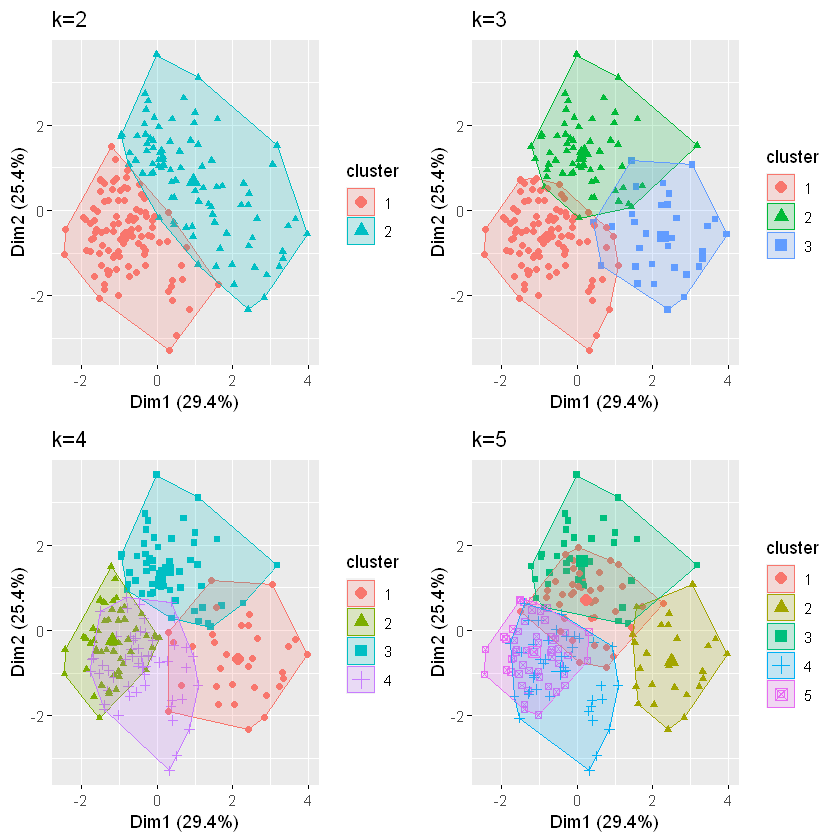

In [18]:
grid.arrange(p1,p2,p3,p4, nrow=2)

In [31]:
options(repr.plot.width=15, repr.plot.height=6)
png("FIGURES/k234.png", width=15, height=6, units="in", res=300)
grid.arrange(p1,p2,p3, nrow=1)
dev.off()

png 
  2

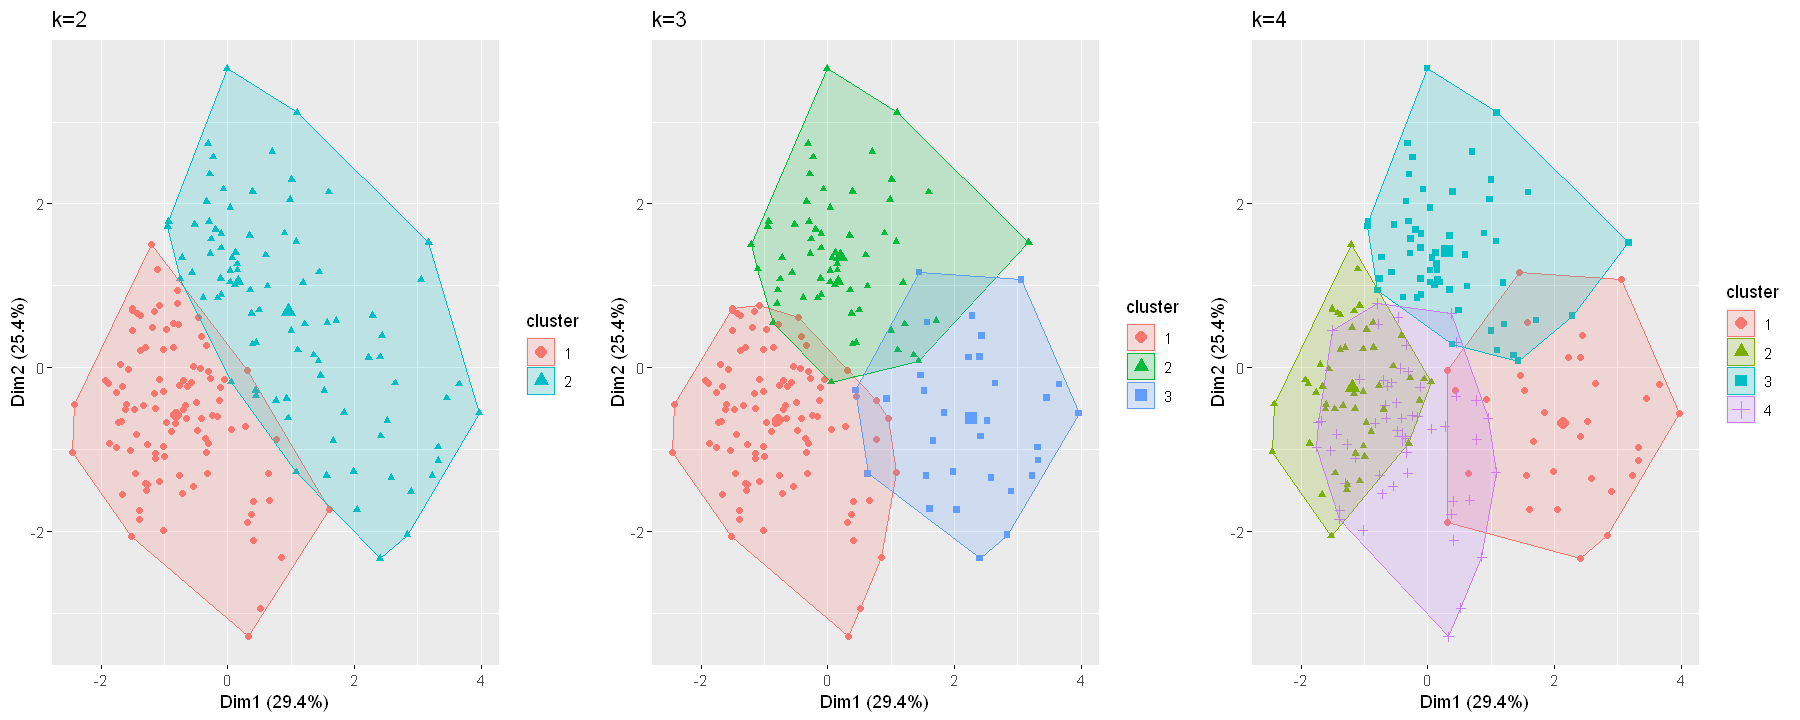

In [32]:
grid.arrange(p1,p2,p3, nrow=1)

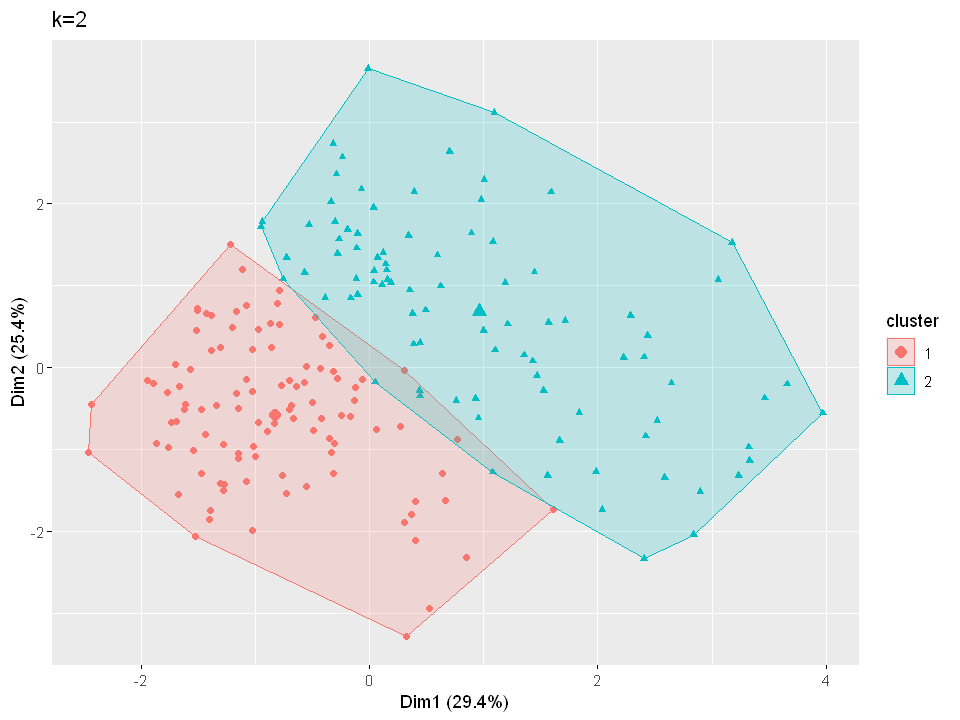

In [26]:
options(repr.plot.width=8, repr.plot.height=6)
fviz_cluster(k2, geom="point", data=df_data_samp) + ggtitle("k=2")

In [36]:
#k2$cluster
table(k2$cluster)


  1   2 
108  92 

In [ ]:
rownames(df_data_samp)

### Hierarchical clustering:

In [30]:
#convert into a matrix for distance calculation
mat_data_samp = data.matrix(df_data_samp, rownames.force = NA)
mat_data_samp

,trackAcoustic,trackInstrum,trackLoud,trackTempo,trackVal,trackDanceable
jazz_electro_61413,-0.7673354,0.68387544,0.31213853,1.334930259,0.44733083,0.09899835
jazz_downtempo_electro_tronica_54425,0.4886981,0.52170368,-1.23260546,-0.282987209,0.44334322,0.77893732
alt_dance_rave_downtempo_electro_tronica_99556,-0.7551704,1.38191913,0.27944812,0.339949441,1.34055601,0.59564942
house_electro_74362,-0.7975789,0.95533687,-0.27043390,0.107139300,0.04059436,0.59564942
rock_pop_indie_46208,-0.7913274,0.37715928,0.12502251,0.413043828,1.22890287,0.58973691
rumba_flamenco_178200,-0.3358168,2.88377069,0.05890981,-0.207180471,1.67152785,0.91492511
jazz_147812,1.7558828,2.37962803,-0.47340721,-1.549898617,-1.18759027,-1.33774225
rock_alt_pop_metal_funk_grunge_61605,-0.8115179,0.65214618,0.56829475,0.287162915,0.64272384,0.02213568
rock_indie_psych_73236,-0.3594709,0.88835288,0.35141582,-1.082331005,1.03350986,0.18768604
rock_alt_indie_melanch_102258,1.8809117,1.44537764,-0.65076490,-0.355107931,-1.79929002,-1.07167917


In [50]:
#hclust with cosine similarity
hc.out_data <- hclust(as.dist(cosine(t(mat_data_samp))), method="complete")
hc.out_data


Call:
hclust(d = as.dist(cosine(t(mat_data_samp))), method = "complete")

Cluster method   : complete 
Number of objects: 200 


In [42]:
?plot

In [46]:
par(cex=0.4)

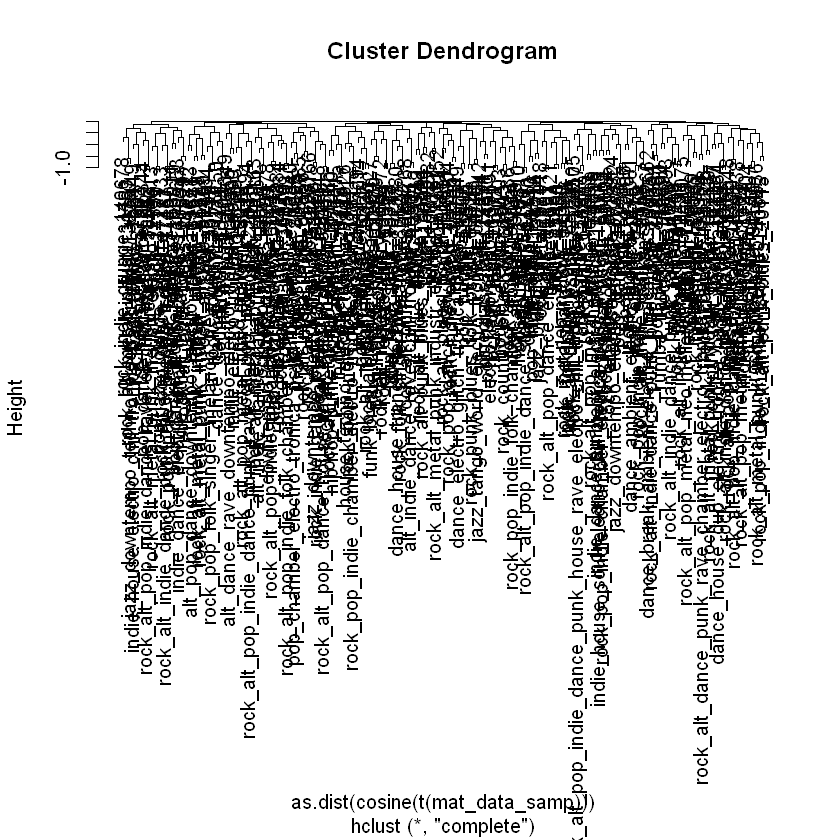

In [51]:
plot(hc.out_data)